In [1]:
import numpy as np 
import pandas as pd 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

**Loading  Data and study the rows and column values**

In [2]:
data = pd.read_csv("train.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
                  datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Date is to be in Date-time format inorder to perform a time series study. In the current dataset the date is stated as an object which  is to be converted by parsing through the read-csv command  

In [4]:
data = pd.read_csv("train.csv")
data.datetime = pd.to_datetime(data.datetime).dt.date
data.columns
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.datetime = pd.to_datetime(data.datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
final_data = data['count']

In [11]:
final_data

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

Now sort the dataset from oldest - recent 

In [16]:
data = final_data.sort_index()
data.head()

,datetime,count
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1


Text(0, 0.5, '')

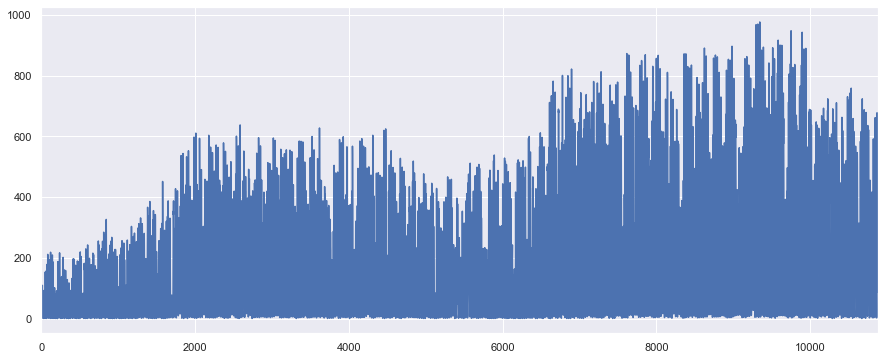

In [12]:
data['count'].plot()
plt.ylabel("")

In this model I am trying to predict the Closing price of Bitcoin, and so I create a new object eliminating other columns

In [13]:
ts = data

In [15]:
data2 = data['count']

This part is inspired by: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ 

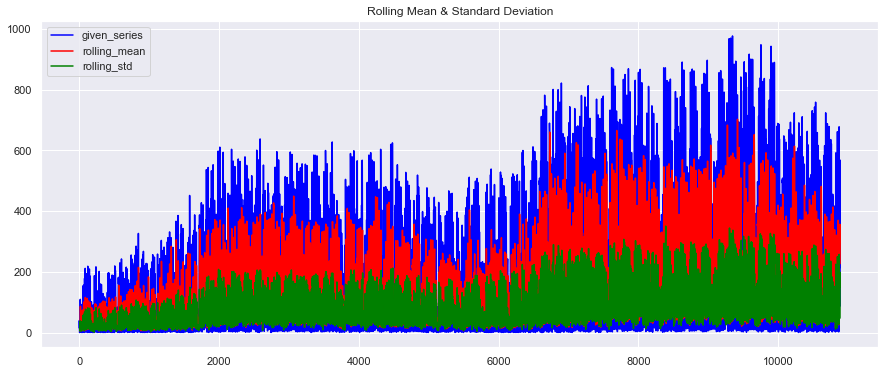

Results of Dickey-Fuller Test:
Test Statistic                -6.419976e+00
p-value                        1.801620e-08
#Lags Used                     3.600000e+01
Number of Observations Used    1.084900e+04
Critical Value (1%)           -3.430953e+00
Critical Value (5%)           -2.861806e+00
Critical Value (10%)          -2.566912e+00
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data2)   

### The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies  with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary


# Transforming the data - (to eliminate trend)

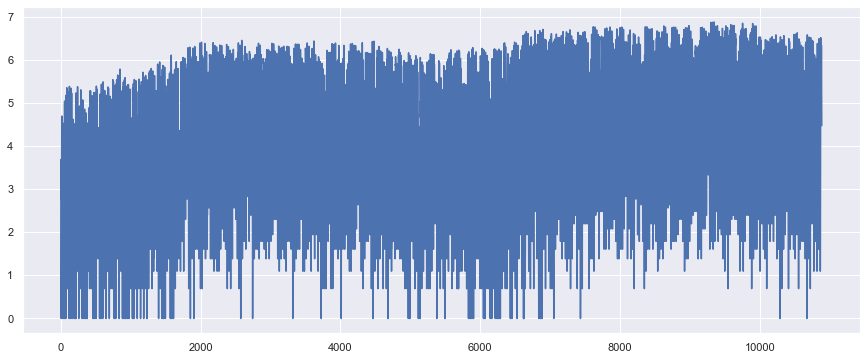

In [17]:
ts_logtransformed = np.log(data2)
plt.plot(ts_logtransformed)

In [18]:
ts_logtransformed.head(10)

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
5    0.000000
6    0.693147
7    1.098612
8    2.079442
9    2.639057
Name: count, dtype: float64

# Smoothing by Rolling average

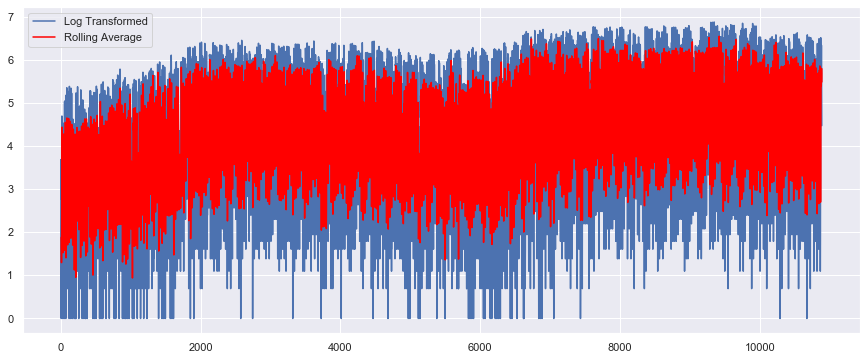

In [19]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')


The red line shows the rolling mean. Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. This can be observed as:

In [20]:
Rolling_average.head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    1.883614
7    1.644475
8    1.414555
9    1.296458
Name: count, dtype: float64

 Lets subtract this Rolling average this from the original log transfomred series.

In [21]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

10876   -0.170627
10877    0.063094
10878    0.398712
10879    0.743125
10880    0.606137
10881    0.028899
10882   -0.321058
10883   -0.644673
10884   -0.821932
10885   -1.013864
Name: count, dtype: float64

 Replace NAN with 0 in the above dataframe to avoid any errors in the future. 

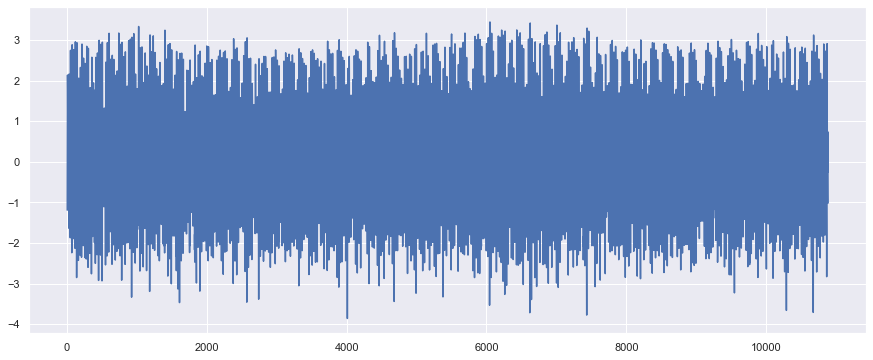

In [22]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

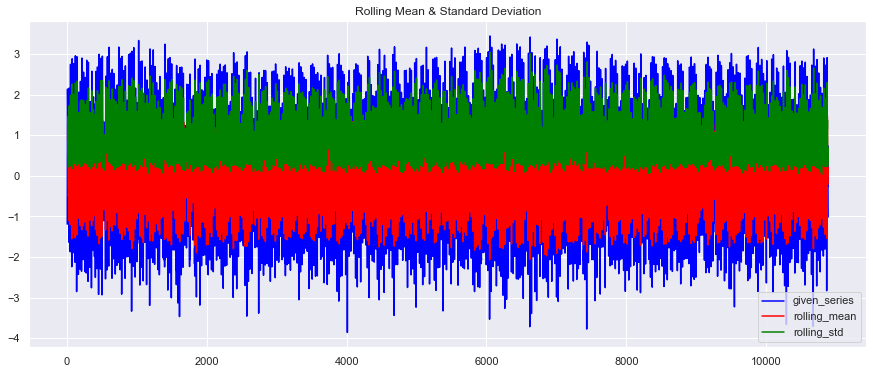

Results of Dickey-Fuller Test:
Test Statistic                   -23.690216
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10840.000000
Critical Value (1%)               -3.430953
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [23]:
test_for_stationary(log_Rolling_difference)

Use exponential_weighted_moving_average instead of moving average to improve the solution

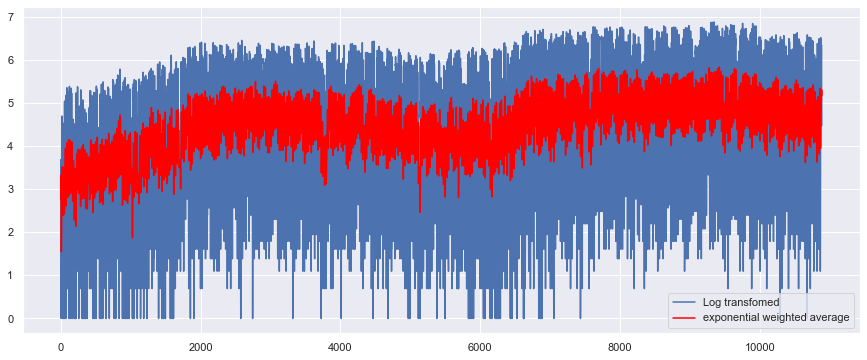

In [24]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [25]:
expwighted_avg.head(10)

0    2.772589
1    3.253399
2    3.331290
3    3.110383
4    2.359446
5    1.862879
6    1.642323
7    1.548637
8    1.633479
9    1.784317
Name: count, dtype: float64

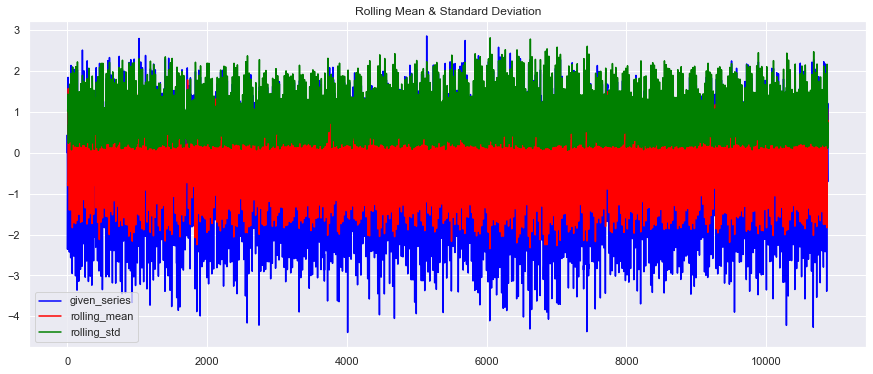

Results of Dickey-Fuller Test:
Test Statistic                   -22.940048
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10846.000000
Critical Value (1%)               -3.430953
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [26]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

Now the current time series is stationary,the TS (test_statistic) value is less than 1% critcal value. Since weights are assigned to values from the starting index. Therefore the test works  

Few other methods to eliminate Trend and seasonality.
Here i am implementing Differencing and Decompostion


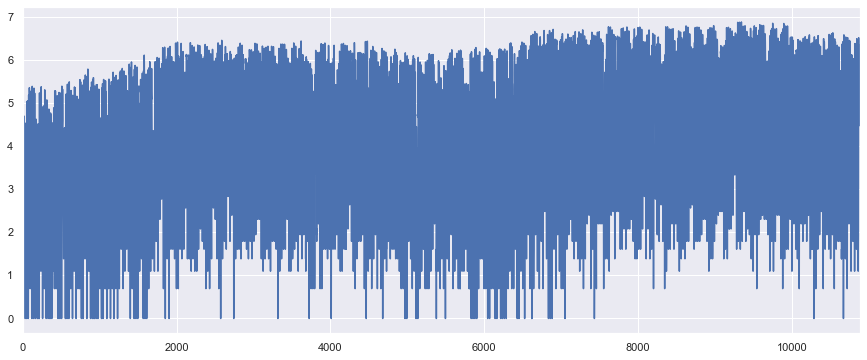

In [27]:
ts_logtransformed.plot()

## Seasonality Adjustment by Differencing
Seasonal components in a Time series can be elimnated by using differencing. If there is a seasonal component at level of one month, then it can be removed on an observation today by substracting the value from last month (Ex: Value(Oct 1)-Value(sep 1), value (oct 2 - Value(Sep 2),.....) We can substract last months data to the presents (giving a gap of 30 days) and first months data would not be available for modeling

I am trying to difference different types of seasonality and test for statioanarized data

In [28]:
#X = ts_logtransformed
#diff = list()
#days_in_quarter = 91
#for i in range(days_in_quarter, len(X)):
 #   value = X[i] - X[i - days_in_quarter]
#    diff.append(value)
#plt.plot(diff)
#diff = pd.Series(diff)
#diff
#plt.plot(diff)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7   -1.673976
8   -1.609438
9   -0.826679
Name: count, dtype: float64

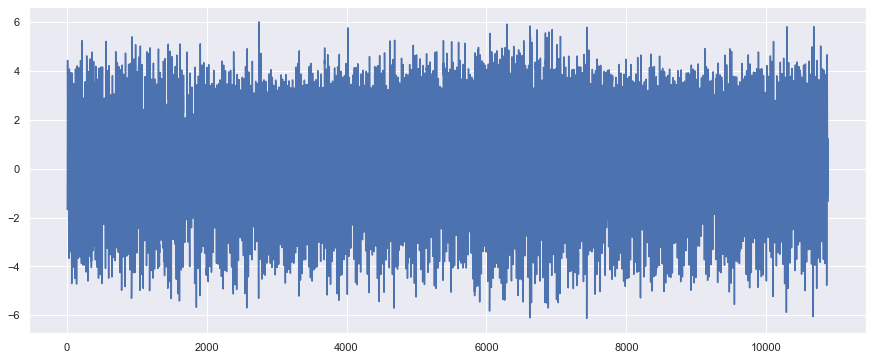

In [29]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

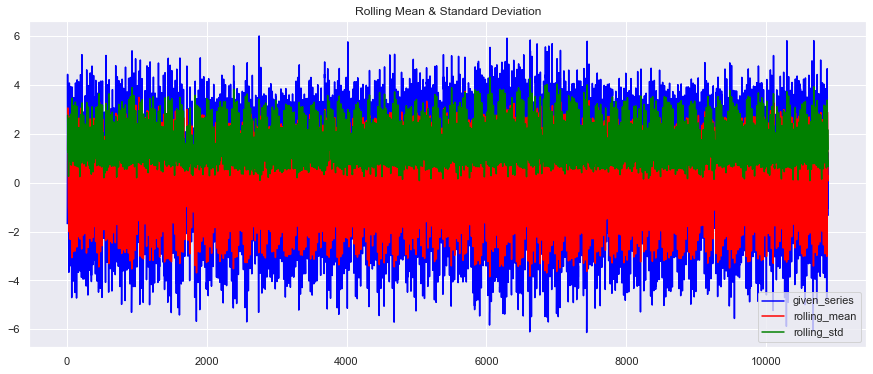

Results of Dickey-Fuller Test:
Test Statistic                   -25.356877
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10839.000000
Critical Value (1%)               -3.430953
Critical Value (5%)               -2.861807
Critical Value (10%)              -2.566912
dtype: float64


In [30]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

The Dickey-Fuller test statis is very much less than 1% criticasl value than in the previous case. We can say that the Time series is stationary with 99% confidence 

# Forecasting

In [31]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

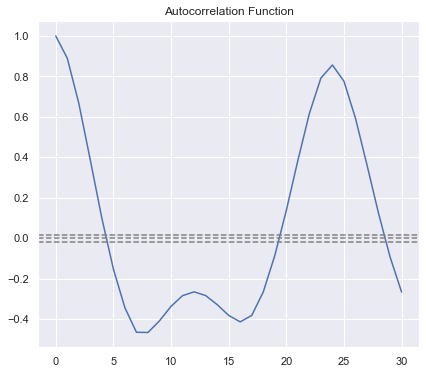

In [32]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

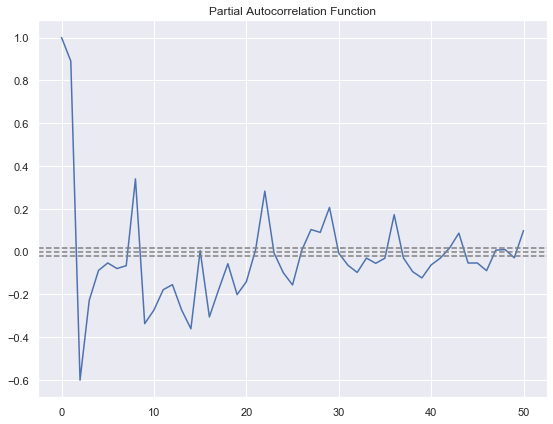

In [33]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

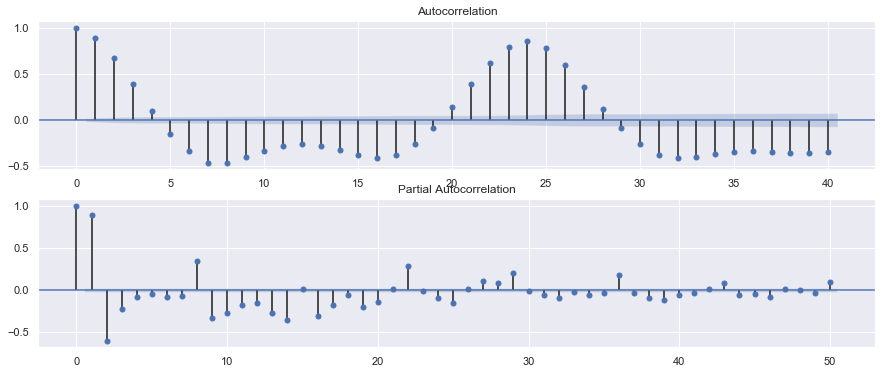

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

Below are some observations from the plots.

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:
the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively
p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2, The PACF shows a significant lag on day 2 

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=18, since the ACF shows a significant lag for 18th day.

The PACF  perhaps has  some significant lag at 7th, 8th, 12th, 15th day and so on, which also suggests that there is still some seasonality present in the differenced data. We will try different orders of ARIMA models to identify the best order by deriving the residual sum of squares(RSS) for each model. Lower RSS are considered to be the best ones

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

# AR Model

In [37]:
#model = ARIMA(ts_logtransformed, order=(20, 1, 0))  
#results_AR = model.fit(disp=-1)  
#plt.plot(ts_diff_logtrans)
#plt.plot(results_AR.fittedvalues, color='red', label = 'order 20')
#RSS = results_AR.fittedvalues-ts_diff_logtrans
#RSS.dropna(inplace=True)
#plt.title('RSS: %.4f'% sum(RSS**2))
#plt.legend(loc = 'best')

In [38]:
#model = ARIMA(ts_logtransformed, order=(15, 1, 0))  
#results_AR = model.fit(disp=-1)  
#plt.plot(ts_diff_logtrans)
#plt.plot(results_AR.fittedvalues, color='red', label = 'order 15')
#RSS = results_AR.fittedvalues-ts_diff_logtrans
#RSS.dropna(inplace=True)
#plt.title('RSS: %.4f'% sum(RSS**2))
#plt.legend(loc = 'best')

In [39]:
#model = ARIMA(ts_logtransformed, order=(12, 1, 0))  
#results_AR = model.fit(disp=-1)  
#plt.plot(ts_diff_logtrans)
#plt.plot(results_AR.fittedvalues, color='red', label = 'order 12')
#RSS = results_AR.fittedvalues-ts_diff_logtrans
#RSS.dropna(inplace=True)
#plt.title('RSS: %.4f'% sum(RSS**2))
#plt.legend(loc = 'best')

In [40]:
#model = ARIMA(ts_logtransformed, order=(7, 1, 0))  
#results_AR = model.fit(disp=-1)  
#plt.plot(ts_diff_logtrans)
#plt.plot(results_AR.fittedvalues, color='red', label = 'order 7')
#RSS = results_AR.fittedvalues-ts_diff_logtrans
#RSS.dropna(inplace=True)
#plt.title('RSS: %.4f'% sum(RSS**2))
#plt.legend(loc = 'best')

In [41]:
#indexedDataset = data.set_index(['datetime'])

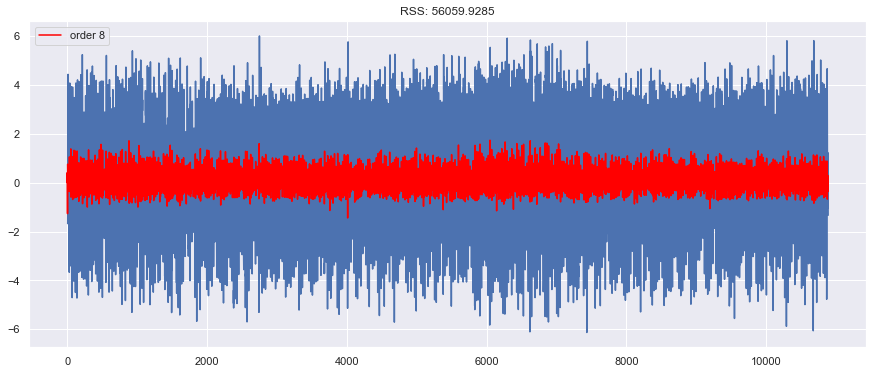

In [42]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

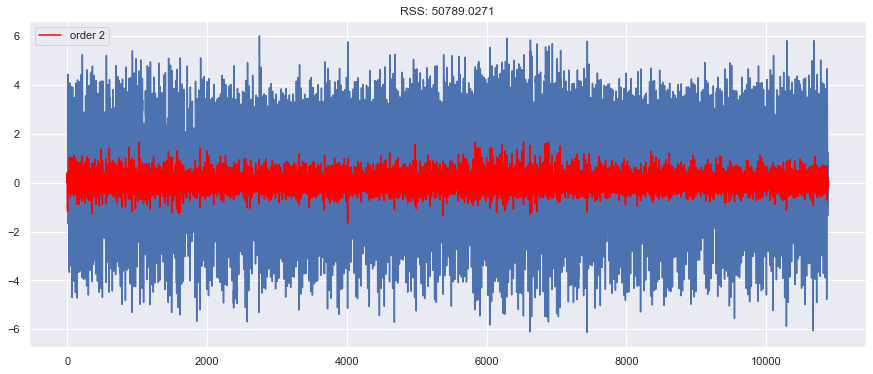

In [43]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [48]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                10885
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -10313.410
Method:                       css-mle   S.D. of innovations              0.624
Date:                Sat, 13 Jun 2020   AIC                          20634.820
Time:                        22:10:33   BIC                          20664.000
Sample:                             1   HQIC                         20644.656
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.010      0.019      0.985      -0.020       0.021
ar.L1.D.count     0.4711      0.010     49.189      0.000       0.452       0.490
ar.L2.D.count    -0.0434      0.010     

# MA model

Text(0.5, 1.0, 'RSS: 55314.9156')

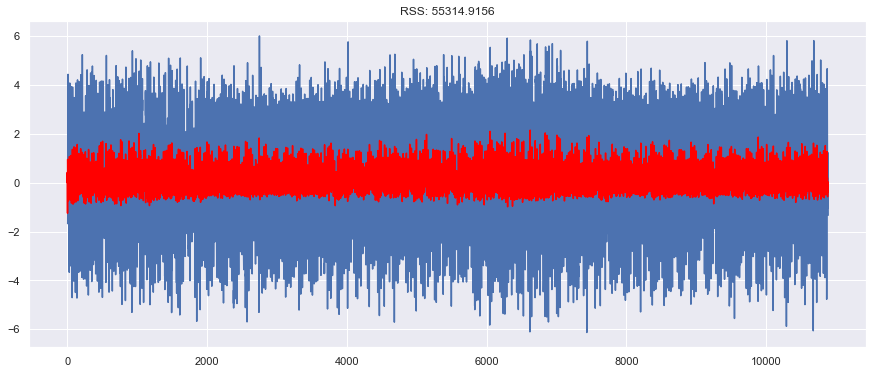

In [45]:
model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))

In [46]:
#model summary
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                10885
Model:                ARIMA(0, 1, 18)   Log Likelihood               -8760.597
Method:                       css-mle   S.D. of innovations              0.541
Date:                Sun, 14 Jun 2020   AIC                          17561.194
Time:                        14:39:35   BIC                          17707.097
Sample:                             1   HQIC                         17610.374
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001      0.000      1.258      0.208   -7.44e-05       0.000
ma.L1.D.count      0.2204      0.010     22.731      0.000       0.201       0.239
ma.L2.D.count     -0.0149      0.010

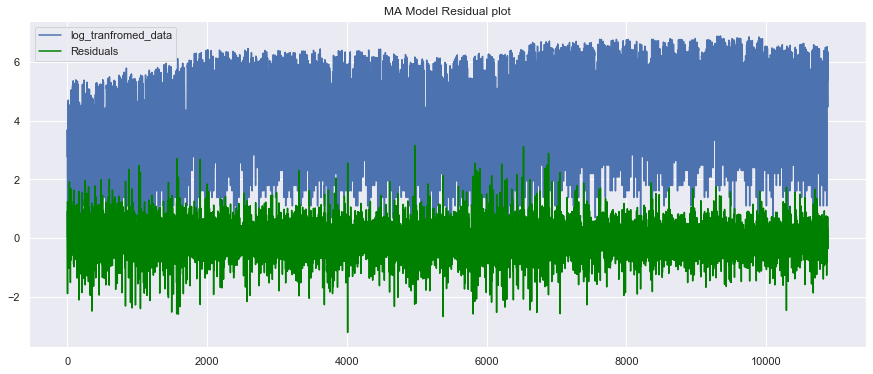

In [48]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    10885.000000
mean         0.000961
std          0.541268
min         -3.212051
25%         -0.269143
50%          0.019671
75%          0.288031
max          3.159024
dtype: float64


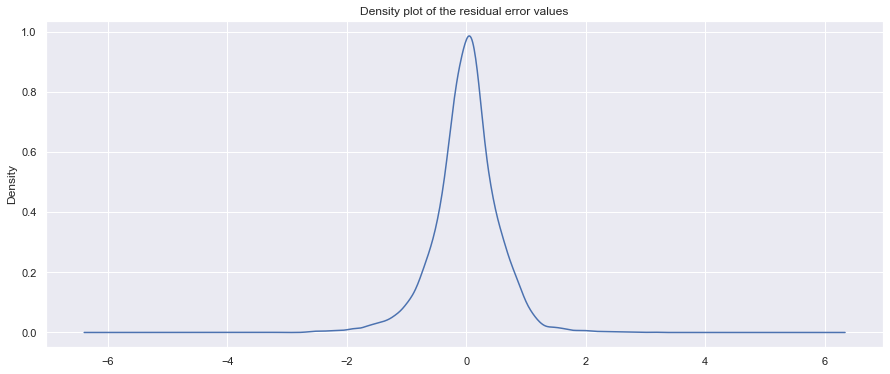

In [49]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

# ARIMA Combined model

In [53]:
model = ARIMA(ts_logtransformed, order=(8, 1, 18))  
results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

KeyboardInterrupt: 

model = ARIMA(ts_logtransformed, order=(20, 1, 18)) 
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'order 15')
RSS = results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

### Searching ARIMA parameters.
The above plots and models derive varying residual RSS. evaluating all these models might be difficult. SO we do a grid search on all possible ARIMA parameters. We look for different p,d,q combinations, and find the best combination.
p = 7 ,10,13,16,19
d = 0 to 2
taking 10 runs of the model and this will take some time to run

The following markdown is a python code that helps to evaluate different model performances to evaluate best ARIMA hyperparameters

import warnings
def evaluate_arima_model(data_set, arima_order):
    model = ARIMA(data_set, order=arima_order)
    results_ARIMA = model.fit(disp=-1) 
    RSS_diff = results_ARIMA.fittedvalues-ts_diff_logtrans
    RSS = RSS_diff**2
    return RSS
def evaluate_models(dataset, p_values, d_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            order = (p,d,18)
            try:
                rss = evaluate_arima_model(dataset, order)
                if rss < best_score:
                    best_score, best_cfg = rss, order
                print('ARIMA%s RSS=%.3f' % (order,rss))
            except:
                continue
    print('Best ARIMA%s RSS=%.3f' % (best_cfg, best_score))
p_values = range(8,20,3)
d_values = range(0,3)
warnings.filterwarnings('ignore')
evaluate_models(ts_logtransformed,p_values,d_values)

We can derive the Summary of the ARIMA model as follows explaining the results

In [88]:
#model summary
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                10885
Model:                ARIMA(8, 1, 18)   Log Likelihood               -7585.680
Method:                       css-mle   S.D. of innovations              0.486
Date:                Sun, 07 Jun 2020   AIC                          15225.359
Time:                        21:13:45   BIC                          15422.328
Sample:                             1   HQIC                         15291.752
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.count      0.6218      0.013     46.653      0.000       0.596       0.648
ar.L2.D.count     -0.1833      0.021     -8.580      0.000      -0.225      -0.141
ar.L3.D.count      0.7412      0.015

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


NameError: name 'results_ARIMA' is not defined

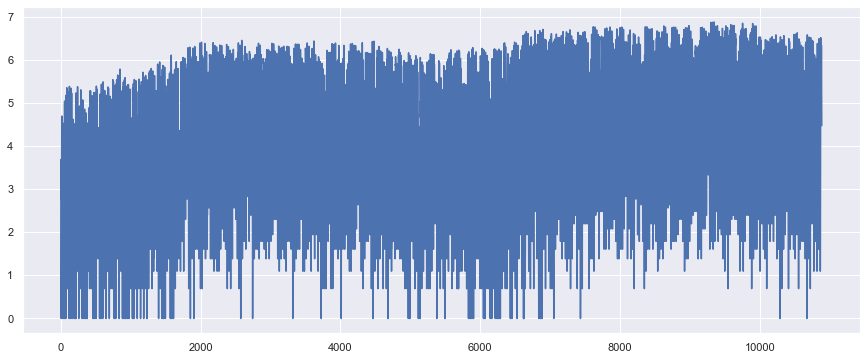

In [47]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001535
std         0.041545
min        -0.266411
25%        -0.012498
50%         0.001836
75%         0.017867
max         0.318732
dtype: float64


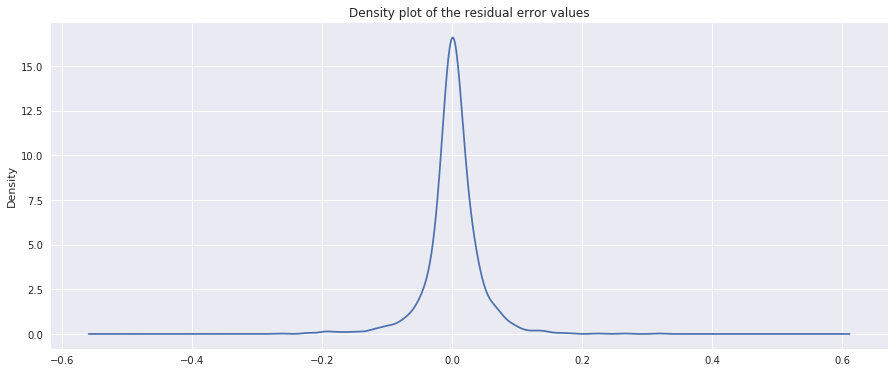

In [56]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [57]:
#test = pd.read_csv("../input/bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
#test.index = pd.to_datetime(test.index)
#test = test['Close']
#test = test.sort_index()
#test
data = data.sort_index()

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

## Using Combined ARIMA model to predict and forecast

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30    0.000214
2013-05-01   -0.003366
2013-05-02   -0.000140
2013-05-03    0.012158
dtype: float64


In [59]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000214
2013-05-01   -0.003152
2013-05-02   -0.003292
2013-05-03    0.008866
dtype: float64


In [60]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899620
2013-05-01    4.896254
2013-05-02    4.896114
dtype: float64

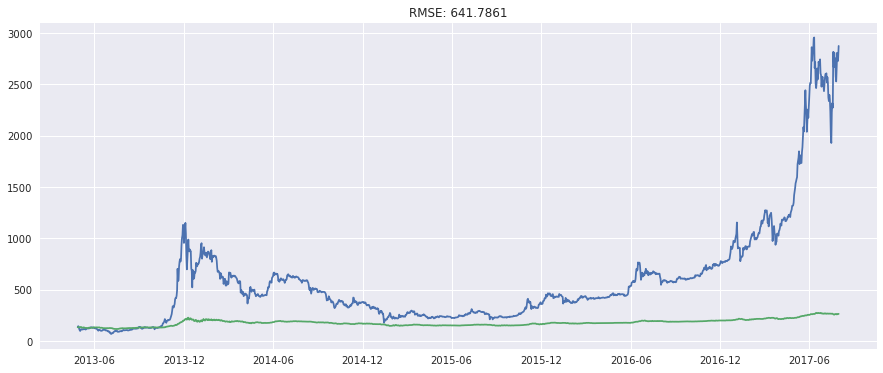

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [62]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2871.243213
2017-08-02    2940.699509
2017-08-03    2989.790766
2017-08-04    3016.172986
2017-08-05    2953.217515
2017-08-06    2948.120379
2017-08-07    2983.645389
dtype: float64
Test MSE: 63109.487


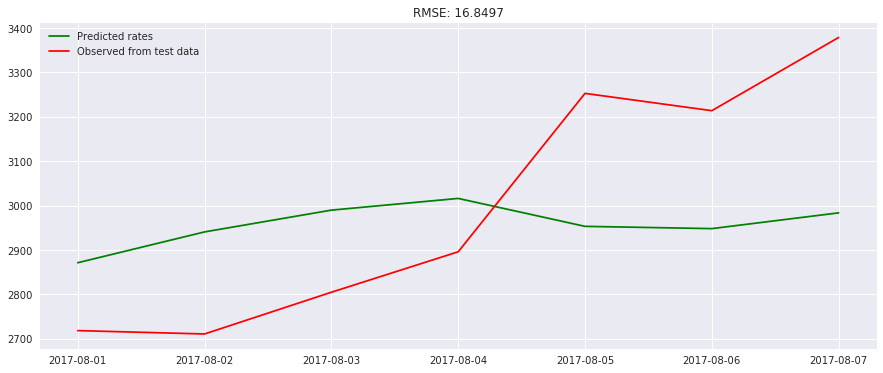

In [63]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

## Using MA model to predict and forecast

Here we can see that the AR and MA, and the combined ARIMA models have almost the same RSS but MA model is significantly better in computational performance. So we use it to predict the price.



In [91]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

1    0.000133
2    0.422788
3   -0.235740
4   -0.675100
5   -1.248368
dtype: float64


In [51]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

1    0.000133
2    0.422922
3    0.187182
4   -0.487918
5   -1.736286
dtype: float64


Notice that the predictions arent starting from 2013-04-28. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number

In [52]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

0    2.772589
1    2.772722
2    3.195510
3    2.959770
4    2.284670
dtype: float64

In [56]:
dt = data['count']

Text(0.5, 1.0, 'RMSE: 263.6446')

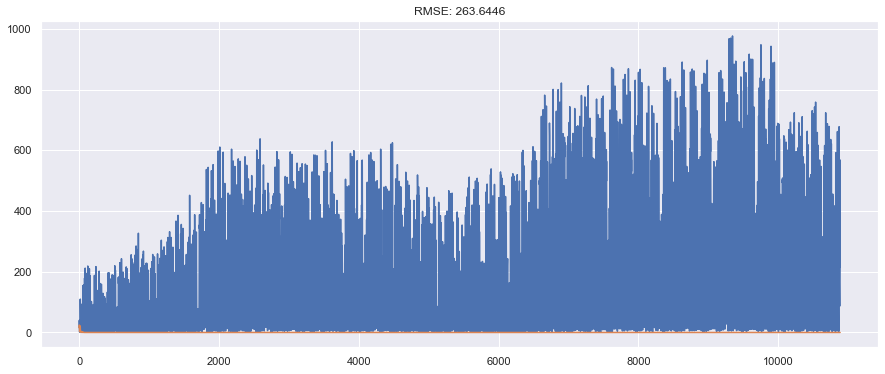

In [58]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(dt)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-dt)**2)/len(data)))

In [59]:
predictions_MA

0        16.000000
1        16.002134
2        24.422637
3        19.293541
4         9.822448
           ...    
10881     0.009672
10882     0.006857
10883     0.004642
10884     0.003538
10885     0.002533
Length: 10886, dtype: float64

In [65]:
test = data['count']

In [72]:
test= test[:7]

In [73]:
test.shape

(7,)

In [79]:
results_MA

In [86]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
#error = mean_squared_error(test, forecast)
#print('Test MSE: %.3f' % error)

2017-08-01    58.543788
2017-08-02    37.748233
2017-08-03    29.954967
2017-08-04    31.009476
2017-08-05    40.103712
2017-08-06    70.198186
2017-08-07    70.207550
dtype: float64


In [88]:
forecast

2017-08-01    58.543788
2017-08-02    37.748233
2017-08-03    29.954967
2017-08-04    31.009476
2017-08-05    40.103712
2017-08-06    70.198186
2017-08-07    70.207550
dtype: float64

In [89]:
test

0    16
1    40
2    32
3    13
4     1
5     1
6     2
Name: count, dtype: int64

In [87]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(dt)))
plt.legend(loc = 'best')

ValueError: view limit minimum -36827.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Much work has to be done on eliminating hte seasonality in the above time series. More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.

An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.

We can start off by resampling the dataset to a monthly average price. The resampling methods handles the concept of leap years while eliminating the offset  (for example feb has only 28 days ). 

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
2013-09-30    130.061667
2013-10-31    158.311935
2013-11-30    550.420667
2013-12-31    800.780968
2014-01-31    844.168387
2014-02-28    661.618214
2014-03-31    592.200323
2014-04-30    461.362000
Freq: M, Name: Close, dtype: float64


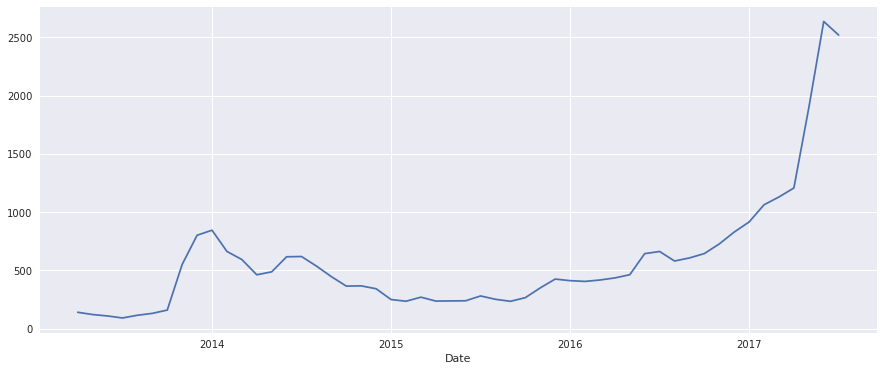

In [70]:
monthly_mean = data.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

## One more alternative to derive the forecasting performance

In [71]:
test_logtransformed = np.log(test)

In [72]:
history = [x for x in ts_logtransformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)


predicted=7.963377, expected=7.907747
predicted=7.963377, expected=7.904951
predicted=7.963377, expected=7.939063
predicted=7.963377, expected=7.971048
predicted=7.963377, expected=8.087305
predicted=7.963377, expected=8.075253
predicted=7.963377, expected=8.125317
Test MSE: 0.009


Much work has to be done on eliminating hte seasonality in the above time series. More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.

An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.

We can start off by resampling the dataset to a monthly average price. The resampling methods handles the concept of leap years while eliminating the offset  (for example feb has only 28 days ). 

In [73]:
from fbprophet import Prophet

In [74]:
data.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [75]:
data_prophet = data.copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop=False, inplace=True)
data_prophet.columns =['ds','y']
data_prophet

,ds,y
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
5,2013-05-03,97.75
6,2013-05-04,112.50
7,2013-05-05,115.91
8,2013-05-06,112.30
9,2013-05-07,111.50


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


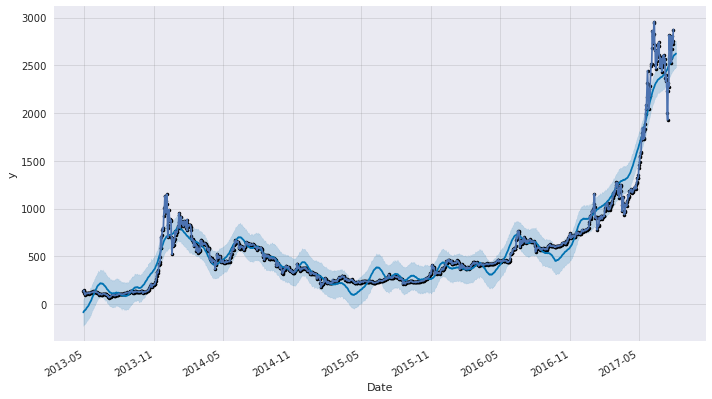

In [76]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=7, freq='D')
forecast = m.predict(future)
m.plot(forecast)
data.plot()


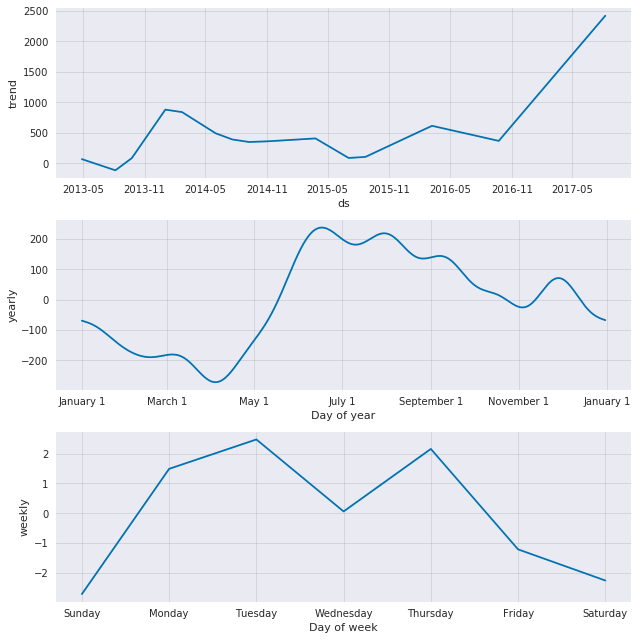

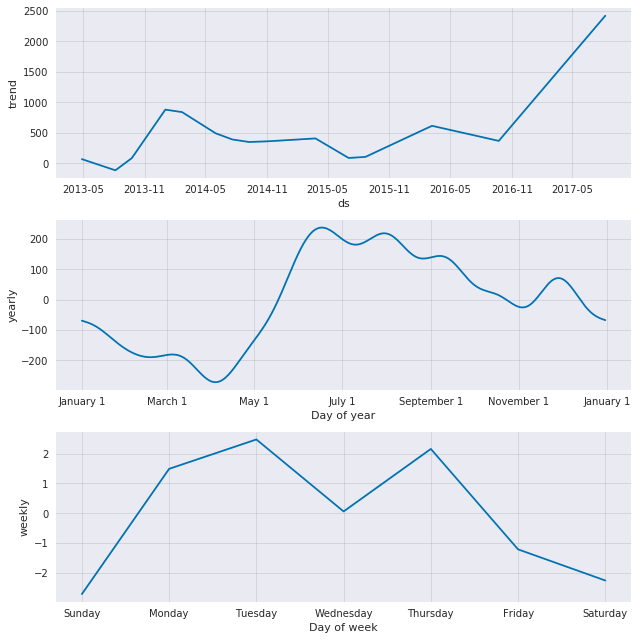

In [77]:
m.plot_components(forecast)

In [78]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

In [79]:
forecasted_values = forecast[['ds', 'yhat']].tail(7)

In [80]:
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

,y
ds,
2017-08-01,2602.223972
2017-08-02,2604.963379
2017-08-03,2611.660358
2017-08-04,2612.358183
2017-08-05,2614.868733
2017-08-06,2617.494982
2017-08-07,2624.347313


In [81]:
mean_squared_error(forecasted_values['y'],test)

210651.12399157134